# Chapter with code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Prepare data

```{admonition} See also:
:class: seealso
All the commands used here are described in the [pandas documentation](https://pandas.pydata.org/docs/index.html)
```

First load a dataset [from github](https://github.com/jenfly/opsd):

In [2]:
data = pd.read_csv('https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv')

And take a look:

In [3]:
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [4]:
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

Let's make the Date column to a `datetime`

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

And set it as the index:

In [6]:
data.set_index('Date', inplace=True)

In [7]:
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


What are the units? See [here](https://github.com/jenfly/opsd/blob/master/time-series-preprocessing.ipynb): it's $GWh$.<br>Rename columns accordingly:

In [8]:
data.rename(axis=1, mapper={col: col+' [GWh]' for col in data.columns}, inplace=True)

In [9]:
data

,Consumption [GWh],Wind [GWh],Solar [GWh],Wind+Solar [GWh]
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


Looks fine.

## Examine data

Now let's have a look at a plot:

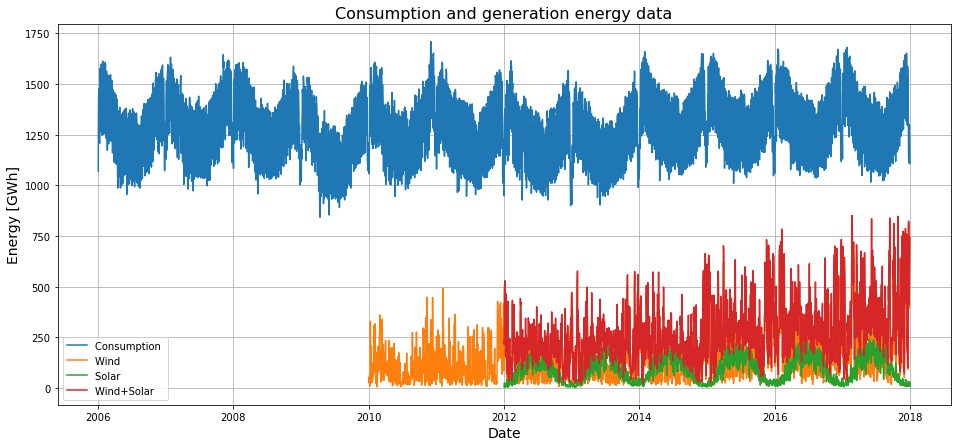

In [10]:
plt.figure(figsize=(16,7))
for col in data.columns:
    plt.plot(data[col], label=col.rstrip('[GWh]'))
plt.title('Consumption and generation energy data',fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy [GWh]', fontsize=14)
plt.grid()
plt.legend();

### Total energy consumption

__How much energy was consumed each year?__

In [11]:
data['year'] = data.index.year

In [12]:
# divide by 1000 => TWh
consumptions_years = data.groupby(axis=0, by='year').sum()/1000

In [13]:
# rename columns accordingly
consumptions_years.rename(axis=1, mapper={col: col.replace('GWh', 'TWh') for col in data.columns},
                          inplace=True)

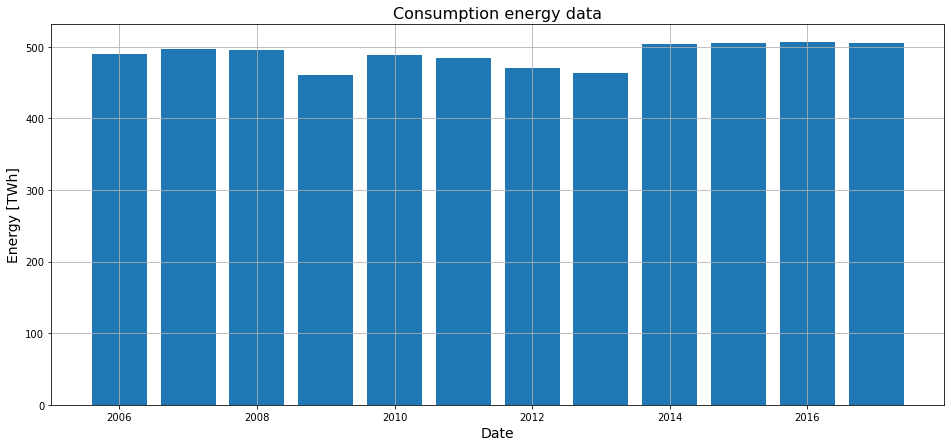

In [14]:
plt.figure(figsize=(16,7))
plt.bar(x=consumptions_years.index, height=consumptions_years[consumptions_years.columns[0]])
plt.title('Consumption energy data',fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy [TWh]', fontsize=14)
plt.grid()

About the same each year

```{admonition} See also
:class: seealso
- Website of the [Umweltbundesamt](https://www.umweltbundesamt.de/daten/energie/stromverbrauch)
- Website of [SMARD](https://www.smard.de/home/marktdaten?marketDataAttributes=%7B%22resolution%22:%22year%22,%22from%22:1420066800000,%22to%22:1483311599999,%22moduleIds%22:%5B5000410%5D,%22selectedCategory%22:null,%22activeChart%22:true,%22style%22:%22color%22,%22region%22:%22DE%22%7D)
```

__How is the consumption for one year?__

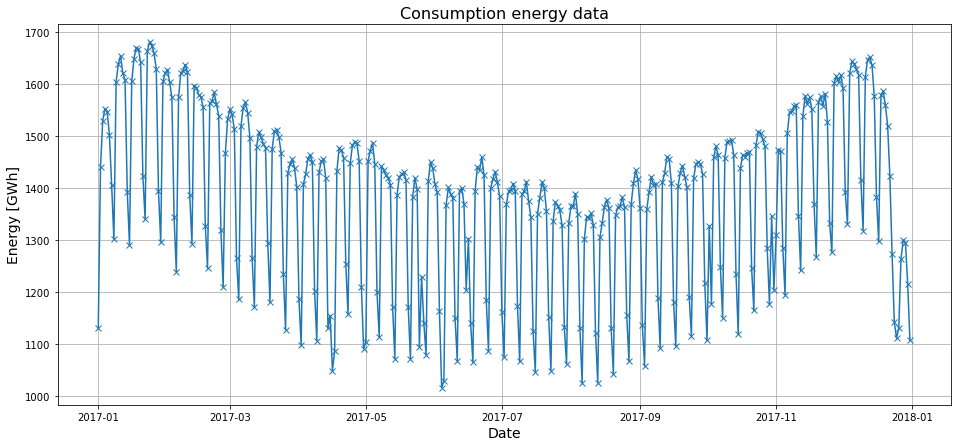

In [15]:
plt.figure(figsize=(16,7))
plt.plot(data.loc['2017', 'Consumption [GWh]'], '-x')
plt.title('Consumption energy data',fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy [GWh]', fontsize=14)
plt.grid()

Looks like 52 weeks a year, with the weekends having lower demand.<br>Look for the mean consumtion per weekday:

In [16]:
data2017daily = pd.DataFrame(data.loc['2017', 'Consumption [GWh]'])
data2017daily['day'] = data2017daily.index.weekday

# mean for the weekdays
data2017dailyGrouped = data2017daily.groupby(axis=0, by='day').mean()

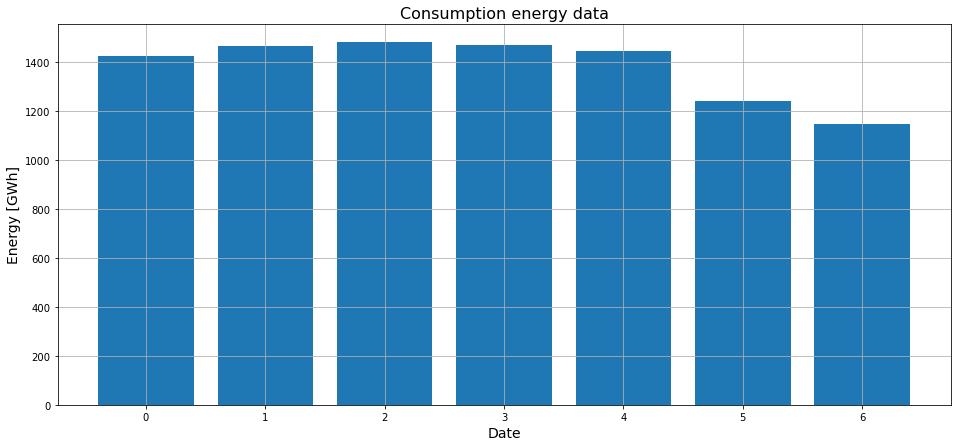

In [17]:
plt.figure(figsize=(16,7))
plt.bar(x=data2017dailyGrouped.index, height=data2017dailyGrouped['Consumption [GWh]'])
plt.title('Consumption energy data',fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy [GWh]', fontsize=14)
plt.grid()

```{admonition} Hint
:class: hint
Numbers 0 to 6 represent the weekdays monday to sunday (see [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html?highlight=datetimeindex#pandas.DatetimeIndex))
```

Confirmed: weekends have lower consumption.

### Total energy generation by renewables

__how much energy was produced each year?__

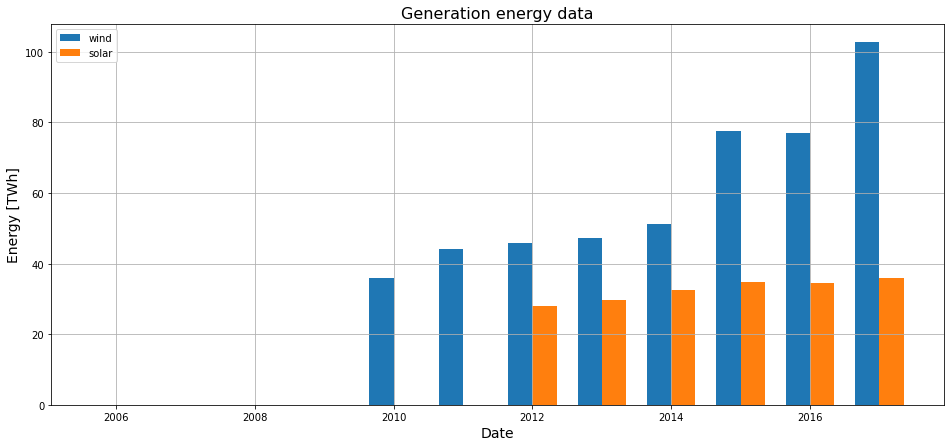

In [29]:
bw = 0.35
plt.figure(figsize=(16,7))
plt.bar(x=consumptions_years.index-bw/2, height=consumptions_years[consumptions_years.columns[1]], label='wind',
       width=bw)
plt.bar(x=consumptions_years.index+bw/2, height=consumptions_years[consumptions_years.columns[2]], label='solar',
       width=bw)

plt.title('Generation energy data',fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy [TWh]', fontsize=14)
plt.grid()
plt.legend();

```{admonition} Info
:class: hint
There was already generation by renewables before 2010, there is just no data provided in the dataset
```

Significant rise in generation by windpower since 2014, only slow rise in generation by pv.